Autoencoder in Action
---

This file, I show and analise the performance of the trained autoencoder.

In [1]:
from NeuralNet import leaky_relu
from NeuralNet import sigmoid
from NeuralNet import tanh
from NeuralNet import NN

Upload the data and trained model's weights:

In [2]:
#upload the weights of the model
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load digits (8x8 grayscale images)
digits = load_digits()
X = digits.data  # shape: (1797, 64)

# Normalize pixel values to [0, 1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split into train/test sets
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

# ========== Create the Autoencoder ==========
autoencoder = NN(input_size=64)

# -------- Encoder --------
autoencoder.add_layer(50, activation_function=tanh)
autoencoder.add_layer(40, activation_function=tanh)
autoencoder.add_layer(36, activation_function=tanh)  # Bottleneck

# -------- Decoder --------
autoencoder.add_layer(40, activation_function=tanh)
autoencoder.add_layer(50, activation_function=tanh)
autoencoder.add_layer(64, activation_function=sigmoid)  # Output layer


In [3]:
#Update the model weights
# Load back with allow_pickle=True
loaded_layer_weights = np.load('layer_weights.npy', allow_pickle=True)

# Restore weights into model layers
for layer, weights in zip(autoencoder.layers, loaded_layer_weights):
    layer._update_weights(weights)


---
Place to try how the model works on chosed examples:
---

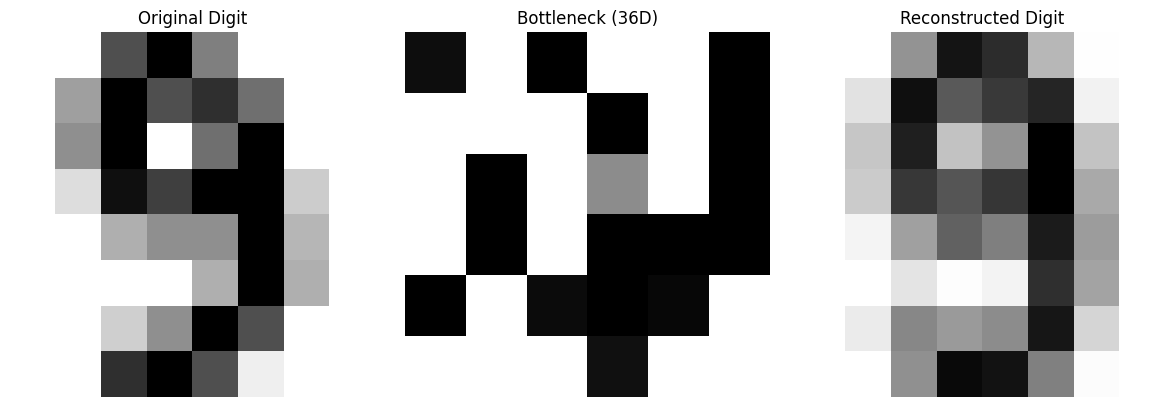

In [4]:
import matplotlib.pyplot as plt

# Select a sample from the test set
sample_idx = 1                   #<--------------- chose the index of the sample to see how it works(0-200) 
x_sample = X_test[sample_idx]

# === Get original image ===
original_image = x_sample.reshape(8, 8)

# === Run through the autoencoder ===
_ = autoencoder._predict(x_sample)  # Forward pass
encoded = autoencoder.activations[3]  # Bottleneck output (32D)
reconstructed = autoencoder.activations[-1].reshape(8, 8)

# === Plotting ===
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Original
axs[0].imshow(original_image, cmap='binary')  # black digit, white background
axs[0].set_title("Original Digit")
axs[0].axis('off')

# Bottleneck
axs[1].imshow(encoded.reshape(6, 6), cmap='binary')  # reshape to visualize
axs[1].set_title("Bottleneck (36D)")
axs[1].axis('off')

# Reconstructed
axs[2].imshow(reconstructed, cmap='binary')
axs[2].set_title("Reconstructed Digit")
axs[2].axis('off')

plt.tight_layout()
plt.show()


---

10 examples of how the model works like:

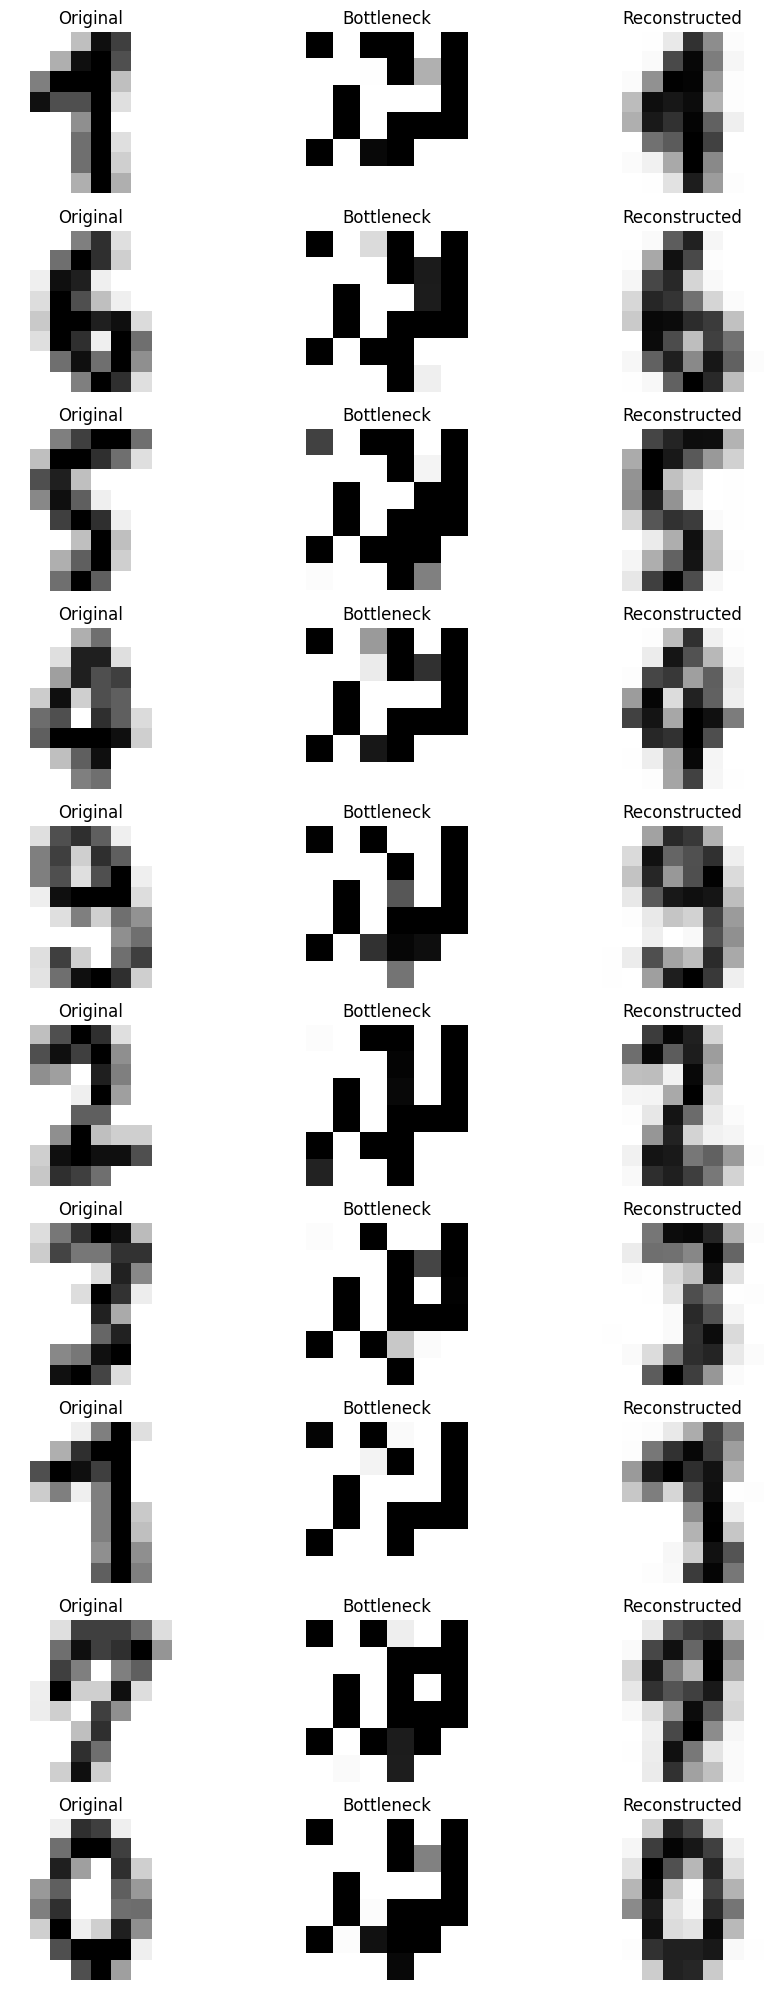

In [5]:

# === Choose 10 random indices from the test set ===
num_examples = 10
random_indices = np.random.choice(len(X_test), size=num_examples, replace=False)

# === Prepare the figure ===
fig, axs = plt.subplots(num_examples, 3, figsize=(10, num_examples * 2))

for i, idx in enumerate(random_indices):
    x_sample = X_test[idx]

    # === Original image ===
    original_image = x_sample.reshape(8, 8)

    # === Run through the autoencoder ===
    _ = autoencoder._predict(x_sample)
    encoded = autoencoder.activations[3]      # Bottleneck
    reconstructed = autoencoder.activations[-1].reshape(8, 8)

    # === Plot original ===
    axs[i, 0].imshow(original_image, cmap='binary')
    axs[i, 0].set_title("Original")
    axs[i, 0].axis('off')

    # === Plot bottleneck ===
    axs[i, 1].imshow(encoded.reshape(6, 6), cmap='binary')
    axs[i, 1].set_title("Bottleneck")
    axs[i, 1].axis('off')

    # === Plot reconstructed ===
    axs[i, 2].imshow(reconstructed, cmap='binary')
    axs[i, 2].set_title("Reconstructed")
    axs[i, 2].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


---
Overall the model works fine. From 8x8 I compressed the images into 6x6 format.   
Model does not work perfectly, I could use Adam optimizer, better initialization of weights and so on.  
But the pure goal of this project was to see if I could build an easy NN from scratch and I succeded in it.